# keras_ocr을 이용한 OCR 처리
- CRNN 기반 모델은 준비하지 못했습니다 ㅠㅠ

In [1]:
from PIL import Image, ImageDraw, ImageFont
import keras_ocr
import os
import matplotlib.pyplot as plt
import numpy as np

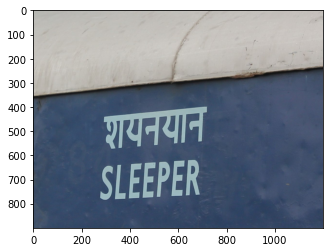

In [2]:
path = os.path.join(os.getenv('HOME'),'aiffel/ocr')
SAMPLE_IMG_PATH = path + '/sample.jpg'
image = plt.imread(SAMPLE_IMG_PATH)
plt.imshow(image)

In [3]:
def detect_text(img_path):
    with Image.open(img_path) as im:

        img = ImageDraw.Draw(im)
        detector = keras_ocr.detection.Detector()
        image = keras_ocr.tools.read(SAMPLE_IMG_PATH)
        boxes = detector.detect(images=[image])[0]
        cropped_imgs = []

        for text_result in boxes:
            print(text_result)
            img.polygon(text_result, outline='red')
            x_min = text_result[:,0].min() - 5
            x_max = text_result[:,0].max() + 5
            y_min = text_result[:,1].min() - 5
            y_max = text_result[:,1].max() + 5
            word_box = [x_min, y_min, x_max, y_max]
            cropped_imgs.append(im.crop(word_box))
    return im, cropped_imgs

Looking for /home/aiffel/.keras-ocr/craft_mlt_25k.h5
[[281.66437 435.20853]
 [721.47235 400.2238 ]
 [733.42975 550.5454 ]
 [293.62177 585.53015]]
[[267.8013  641.50903]
 [694.89276 614.62915]
 [704.3312  764.5946 ]
 [277.2397  791.4745 ]]


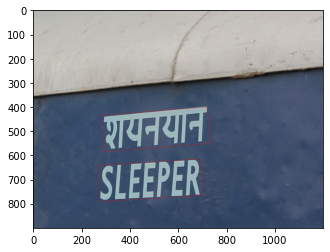

In [4]:
img_pil, cropped_imgs = detect_text(SAMPLE_IMG_PATH)
plt.imshow(np.array(img_pil))

In [5]:
def recognize_img(pil_img):
    np_img = np.array(pil_img)
    recognizer = keras_ocr.recognition.Recognizer()
    prediction = recognizer.recognize(image=np_img)
    print(prediction)

In [6]:
for _img in cropped_imgs:
    recognize_img(_img)

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /home/aiffel/.keras-ocr/crnn_kurapan.h5
ttent
Looking for /home/aiffel/.keras-ocr/crnn_kurapan.h5
sleeper
